## 1. headを確認する

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/signate/train/train.csv'
train_data = pd.read_csv(data_path, low_memory=False)

# データのheadを確認
train_data.head()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,Designation,MonthlyIncome,customer_info,ProdTaken
0,0,50歳,Self Enquiry,2,900秒,Large Business,male,1.0,4.0,Basic,3.0,5,1,4,Executive,253905.0,未婚 車未所持 子供なし,1
1,1,56歳,Company Invited,1,14分,Salaried,Male,1.0,4.0,Standard,3.0,2,1,4,Senior Manager,404475.0,"離婚済み,車あり,子供無し",0
2,2,NaN,Self Enquiry,1,10分,Large Business,Female,1.0,3.0,Basic,3.0,4,0,4,Executive,278145.0,"結婚済み、自動車未所有,子供なし",1
3,3,三十七歳,Self Enquiry,2,1080秒,Small Business,female,1.0,3.0,Standard,4.0,1,0,5,Senior Manager,326805.0,離婚済み、車所持、子供無し,0
4,4,48歳,Company Invited,3,1020秒,Small Business,female,1.0,3.0,Basic,4.0,4,0,4,Executive,258435.0,独身／車所持／無子,1


## 2.trainデータの概要を確認

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/signate/train/train.csv'
train_data = pd.read_csv(data_path, low_memory=False)

# データの概要を確認
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3489 entries, 0 to 3488
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3489 non-null   int64  
 1   Age                     3389 non-null   object 
 2   TypeofContact           3483 non-null   object 
 3   CityTier                3489 non-null   int64  
 4   DurationOfPitch         3368 non-null   object 
 5   Occupation              3489 non-null   object 
 6   Gender                  3489 non-null   object 
 7   NumberOfPersonVisiting  3489 non-null   float64
 8   NumberOfFollowups       3456 non-null   float64
 9   ProductPitched          3489 non-null   object 
 10  PreferredPropertyStar   3489 non-null   float64
 11  NumberOfTrips           3467 non-null   object 
 12  Passport                3489 non-null   int64  
 13  PitchSatisfactionScore  3489 non-null   int64  
 14  Designation             3489 non-null   

## 3.idの削除、欠損値の数と割合を確認する

In [4]:
import pandas as pd
import os

# データファイルを読み込み
data_path = '/Users/hayakawakazue/Downloads/signate/train/train.csv'
train_data = pd.read_csv(data_path, low_memory=False)

# 特徴量を指定して削除
columns_to_drop = ['id']
train_data_cleaned = train_data.drop(columns=columns_to_drop)

# 欠損値の数と割合を確認する
missing_values_count = train_data_cleaned .isnull().sum()
missing_values_percentage = (missing_values_count / len(train_data)) * 100

missing_values_summary = pd.DataFrame({
    '欠損値の数': missing_values_count,
    '欠損値の割合 (%)': missing_values_percentage
})

# 欠損値がある列のみ表示
missing_values_summary = missing_values_summary[missing_values_summary['欠損値の数'] > 0]
missing_values_summary = missing_values_summary.sort_values(by='欠損値の数', ascending=False)

print(missing_values_summary)

# ディレクトリが存在するか確認し、存在しない場合は作成
save_dir = '/Users/hayakawakazue/Downloads/signate/train'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# データを保存
train_data_cleaned_path = os.path.join(save_dir, 'train_drop_id.csv')
train_data_cleaned.to_csv(train_data_cleaned_path, index=False)

print(f"データを保存しました: {train_data_cleaned_path}")


                   欠損値の数  欠損値の割合 (%)
DurationOfPitch      121    3.468042
Age                  100    2.866151
MonthlyIncome         56    1.605044
NumberOfFollowups     33    0.945830
NumberOfTrips         22    0.630553
TypeofContact          6    0.171969
データを保存しました: /Users/hayakawakazue/Downloads/signate/train/train_drop_id.csv


## 4.各特徴量のユニークな値を確認する

In [5]:
import pandas as pd

# データファイルを読み込み
data_path = '/Users/hayakawakazue/Downloads/signate/train/train_drop_id.csv'
train_data = pd.read_csv(data_path, low_memory=False)

# 各特徴量のユニークな値を確認
unique_values_summary = {col: train_data[col].unique() for col in train_data.columns}

# 各特徴量のユニークな値の数を表示
for col, unique_vals in unique_values_summary.items():
    print(f"特徴量 '{col}' のユニークな値の数: {len(unique_vals)}")
    print(f"ユニークな値: {unique_vals[:10]}")  # 最初の10個のユニークな値のみ表示
    print("\n")

# すべてのユニークな値を表示する場合は以下のコメントアウトを外してください
# import ace_tools as tools; tools.display_dataframe_to_user(name="Unique Values Summary", dataframe=pd.DataFrame(unique_values_summary))


特徴量 'Age' のユニークな値の数: 238
ユニークな値: ['50歳' '56歳' nan '三十七歳' '48歳' '19歳' '47歳' '49歳' '33歳' '３１歳']


特徴量 'TypeofContact' のユニークな値の数: 3
ユニークな値: ['Self Enquiry' 'Company Invited' nan]


特徴量 'CityTier' のユニークな値の数: 3
ユニークな値: [2 1 3]


特徴量 'DurationOfPitch' のユニークな値の数: 66
ユニークな値: ['900秒' '14分' '10分' '1080秒' '1020秒' '16分' '840秒' '22分' '20分' '11分']


特徴量 'Occupation' のユニークな値の数: 3
ユニークな値: ['Large Business' 'Salaried' 'Small Business']


特徴量 'Gender' のユニークな値の数: 18
ユニークな値: ['male' 'Male' 'Female' 'female' 'ｆｅｍａｌｅ' 'FEMALE' 'Ｍａｌｅ' 'Fe Male' 'MALE'
 'ｆｅ\u3000ｍａｌｅ']


特徴量 'NumberOfPersonVisiting' のユニークな値の数: 4
ユニークな値: [1. 2. 3. 4.]


特徴量 'NumberOfFollowups' のユニークな値の数: 12
ユニークな値: [  4.   3.   5.   1.   2. 100.  nan 500. 400.   6.]


特徴量 'ProductPitched' のユニークな値の数: 76
ユニークな値: ['Basic' 'Standard' 'Super Deluxe' 'basic' 'SUPER DELUXE' 'super deluxe'
 'BASIC' 'Deluxe' 'deluxe' 'STANᗞARD']


特徴量 'PreferredPropertyStar' のユニークな値の数: 3
ユニークな値: [3. 4. 5.]


特徴量 'NumberOfTrips' のユニークな値の数: 19
ユニークな値: ['5' '2' '4' '1' '年

## 5.各特徴量のユニークな値を全て確認する

In [19]:
import pandas as pd

# データファイルを読み込み
data_path = '/Users/hayakawakazue/Downloads/signate/train/train_drop_id.csv'
train_data = pd.read_csv(data_path, low_memory=False)

# ユニークな値を取得
unique_codes = train_data['Designation'].unique()

# ユニークな値を表示
print(f"Designationのユニークな値の数: {len(unique_codes)}")
print(f"ユニークな値: {unique_codes}")

Designationのユニークな値の数: 53
ユニークな値: ['Executive' 'Senior Manager' 'AVP' 'Manager' 'Senior Manage𝙧' 'Execuｔive'
 'Μanager' 'VP' 'Sеnior Manager' 'ΑVP' 'АVP' 'E×ecutive' 'Mαnage𝙧'
 'Executiѵе' 'Ѕenior Manager' 'Managеr' 'Еxecutivе' 'Senior Μanαger'
 'Еxecuｔive' 'Exеcutivе' 'Exеcutive' 'Senior Managе𝙧' 'Manage𝙧'
 'Senio𝙧 Manager' 'Manαger' 'Μanage𝙧' 'Manαgеr' 'Senior Managеr'
 'Executivе' 'Executiѵe' 'Е×еcutive' 'Еxecutive' 'VＰ' 'Տenior Μanager'
 'Exеcutiѵе' 'Senior Manαger' 'Mαnager' 'Senior Mαnαger' 'E×еcutiѵe'
 'Ѕenior Manαger' 'Exеcｕtive' 'Execｕtive' 'Mαnαger' 'Μanagеr' 'E×ecｕtive'
 'Sеnior Managеr' 'Տenior Manager' 'AVＰ' 'Exеcｕtivе' 'Mαnagеr' 'Еxеcutivе'
 'Senior Mαnager' 'Е×ecutive']


## 6.Ageの修正

In [8]:
import pandas as pd
import unicodedata
import os

# データファイルを読み込み
data_path = '/Users/hayakawakazue/Downloads/signate/train/train_drop_id.csv'
train_data = pd.read_csv(data_path, low_memory=False)

# 年齢の変換辞書を作成
age_conversion_dict = {
    '50歳': 50, '56歳': 56, '三十七歳': 37, '48歳': 48, '19歳': 19, '47歳': 47, '49歳': 49, 
    '33歳': 33, '３１歳': 31, '51歳': 51, '46歳': 46, '４９歳': 49, '53才': 53, '20歳': 20, 
    '25歳': 25, '五十三歳': 53, '20代': 20, '44歳': 44, '30歳': 30, '34歳': 34, '29歳': 29, 
    '30代': 30, '41歳': 41, '50代': 50, '52歳': 52, '22歳': 22, '３６歳': 36, '28歳': 28, 
    '25才': 25, '五十一歳': 51, '48才': 48, '38才': 38, '三十三歳': 33, '42際': 42, '５０代': 50, 
    '35才': 35, '59歳': 59, '四十三歳': 43, '32歳': 32, '４２才': 42, '53歳': 53, '58歳': 58, 
    '40代': 40, '二十六歳': 26, '52際': 52, '54歳': 54, '59才': 59, '29才': 29, '21才': 21, 
    '57歳': 57, '37歳': 37, '35歳': 35, '36才': 36, '38歳': 38, '３７歳': 37, '50才': 50, 
    '51才': 51, '43歳': 43, '四十歳': 40, '26歳': 26, '31歳': 31, '27歳': 27, '40歳': 40, 
    '３４歳': 34, '40際': 40, '21歳': 21, '24才': 24, '45歳': 45, '36歳': 36, '41才': 41, 
    '38際': 38, '18歳': 18, '39歳': 39, '４６歳': 46, '４０代': 40, '５５歳': 55, '58際': 58, 
    '24歳': 24, '41際': 41, '三十一歳': 31, '52才': 52, '３０代': 30, '28才': 28, '55際': 55, 
    '60代': 60, '27際': 27, '３２歳': 32, '60歳': 60, '五十四歳': 54, '29際': 29, '三十四歳': 34, 
    '４７歳': 47, '37際': 37, '二十四歳': 24, '四十七歳': 47, '58才': 58, '39才': 39, '23才': 23, 
    '３３歳': 33, '４２歳': 42, '４５歳': 45, '３９歳': 39, '５４歳': 54, '55歳': 55, '42歳': 42, 
    '３８歳': 38, '47才': 47, '５１歳': 51, '３９才': 39, '51際': 51, '二十七歳': 27, '30才': 30, 
    '２６歳': 26, '４０歳': 40, '36際': 36, '三十歳': 30, '23歳': 23, '二十二歳': 22, '37才': 37, 
    '３０歳': 30, '２８歳': 28, '34才': 34, '五十歳': 50, '四十一歳': 41, '５９歳': 59, '３５歳': 35, 
    '２２歳': 22, '３７才': 37, '四十九歳': 49, '42才': 42, '４４歳': 44, '２５歳': 25, '44際': 44, 
    '33才': 33, '28際': 28, '２４才': 24, '55才': 55, '４８歳': 48, '四十四歳': 44, '31才': 31, 
    '２０代': 20, '二十歳': 20, '22際': 22, '31際': 31, '二十三歳': 23, '39際': 39, '59際': 59, 
    '３３才': 33, '三十六歳': 36, '10代': 18, '２７歳': 27, '49才': 49, '４３歳': 43, '32際': 32, 
    '４１歳': 41, '33際': 33, '二十五歳': 25, '27才': 27, '46際': 46, '二十九歳': 29, '32才': 32, 
    '22才': 22, '２９才': 29, '43才': 43, '四十八歳': 48, '30際': 30, '２９歳': 29, '４３才': 43, 
    '三十八歳': 38, '４５才': 45, '45才': 45, '二十一歳': 21, '57才': 57, '40才': 40, '５２歳': 52, 
    '１９歳': 19, '５３歳': 53, '35際': 35, '61歳': 61, '34際': 34, '２４歳': 24, '四十二歳': 42, 
    '５６才': 56, '26際': 26, '５０歳': 50, '五十八歳': 58, '20才': 20, '50際': 50, '57際': 57, 
    '23際': 23, '１９才': 19, '５７歳': 57, '26才': 26, '五十六歳': 56, '54才': 54, '５８歳': 58, 
    '６０歳': 60, '三十五歳': 35, '44才': 44, '４０才': 40, '２２才': 22, '４４才': 44, '２８才': 28, 
    '３８才': 38, '三十九歳': 39, '54際': 54, '二十八歳': 28, '56際': 56, '五十二歳': 52, '３６才': 36, 
    '46才': 46, '43際': 43, '２０歳': 20, '４１才': 41, '24際': 24, '53際': 53, '45際': 45, '21際': 21, 
    '60際': 60, '２１歳': 21, '３５才': 35, '五十五歳': 55, '47際': 47, '三十二歳': 32, '18際': 18, 
    '四十六歳': 46, '３４才': 34, '56才': 56, '３２才': 32, '５６歳': 56, '４７才': 47, '49際': 49, 
    '48際': 48, '５１才': 51, '五十九歳': 59, '六十一歳': 61, '２１才': 21
}

# Age列のデータタイプを修正する関数
def convert_age(age):
    if pd.isnull(age):
        return age
    age = str(age).strip()
    return age_conversion_dict.get(age, None)

# Age列の修正
train_data['Age'] = train_data['Age'].apply(convert_age)

# データタイプをfloat64に変換してからint64に変換
train_data['Age'] = pd.to_numeric(train_data['Age'], errors='coerce')

# 欠損値を中央値で補完
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())

# int64に変換
train_data['Age'] = train_data['Age'].astype(int)

# 修正後のデータタイプを確認
print(train_data['Age'].dtypes)
print(train_data['Age'].head())

# ユニークな値を取得
unique_codes = train_data['Age'].unique()
# ユニークな値を表示
print(f"Ageのユニークな値の数: {len(unique_codes)}")
print(train_data['Age'].unique())

# ディレクトリが存在するか確認し、存在しない場合は作成
save_dir = '/Users/hayakawakazue/Downloads/signate/train'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# データを保存
train_data_cleaned_path = os.path.join(save_dir, 'train_age_cleaned.csv')
train_data.to_csv(train_data_cleaned_path, index=False)

print(f"データを保存しました: {train_data_cleaned_path}")


int64
0    50
1    56
2    38
3    37
4    48
Name: Age, dtype: int64
Ageのユニークな値の数: 44
[50 56 38 37 48 19 47 49 33 31 51 46 53 20 25 44 30 34 29 41 52 22 36 28
 42 35 59 43 32 58 40 26 54 21 57 27 24 45 18 39 55 60 23 61]
データを保存しました: /Users/hayakawakazue/Downloads/signate/train/train_age_cleaned.csv


## 7.DurationOfPitchの修正　

In [10]:
import pandas as pd
import unicodedata
import os

# データファイルを読み込み
data_path = '/Users/hayakawakazue/Downloads/signate/train/train_age_cleaned.csv'
train_data = pd.read_csv(data_path, low_memory=False)

# DurationOfPitch列のデータタイプを修正する関数
def convert_duration(duration):
    if pd.isnull(duration):
        return duration
    duration = str(duration).strip()
    # 分を秒に変換
    if '分' in duration:
        minutes = int(duration.replace('分', ''))
        return minutes * 60
    # 秒を数値に変換
    if '秒' in duration:
        return int(duration.replace('秒', ''))
    return duration

# DurationOfPitch列の修正
train_data['DurationOfPitch'] = train_data['DurationOfPitch'].apply(convert_duration)

# データタイプをfloat64に変換してからint64に変換
train_data['DurationOfPitch'] = pd.to_numeric(train_data['DurationOfPitch'], errors='coerce')

# 欠損値を中央値で補完
train_data['DurationOfPitch'] = train_data['DurationOfPitch'].fillna(train_data['DurationOfPitch'].median())

# int64に変換
train_data['DurationOfPitch'] = train_data['DurationOfPitch'].astype(int)

# 修正後のデータタイプを確認
print(train_data['DurationOfPitch'].dtypes)
print(train_data['DurationOfPitch'].head())

# ユニークな値を取得
unique_codes = train_data['DurationOfPitch'].unique()
# ユニークな値を表示
print(f"Ageのユニークな値の数: {len(unique_codes)}")
print(train_data['DurationOfPitch'].unique())

# ディレクトリが存在するか確認し、存在しない場合は作成
save_dir = '/Users/hayakawakazue/Downloads/signate/train'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# データを保存
train_data_cleaned_path = os.path.join(save_dir, 'train_duration_cleaned.csv')
train_data.to_csv(train_data_cleaned_path, index=False)

print(f"データを保存しました: {train_data_cleaned_path}")


int64
0     900
1     840
2     600
3    1080
4    1020
Name: DurationOfPitch, dtype: int64
Ageのユニークな値の数: 33
[ 900  840  600 1080 1020  960 1320 1200  660 1920 1440 1380 2100  420
  300  480  780  540 1560  720 1260 1500  360 1860 1680 2160 1620 1980
 1740 1800 2040  240 1140]
データを保存しました: /Users/hayakawakazue/Downloads/signate/train/train_duration_cleaned.csv


## Genderの修正

In [13]:
import pandas as pd
import unicodedata
import os

# データファイルを読み込み
data_path = '/Users/hayakawakazue/Downloads/signate/train/train_duration_cleaned.csv'
train_data = pd.read_csv(data_path, low_memory=False)

# Gender列のデータタイプを修正する関数
def standardize_gender(gender):
    if pd.isnull(gender):
        return gender
    # 全角文字を半角に変換し、すべての文字を小文字に変換
    gender = unicodedata.normalize('NFKC', gender).lower()
    
    # 男性のカテゴリに分類
    if gender in ['male', 'ｍａｌｅ']:
        return 'Male'
    # 女性のカテゴリに分類
    if gender in ['female', 'ｆｅｍａｌｅ', 'fe male', 'fe　male', 'fe male', 'fe male']:
        return 'Female'
    
    return gender

# Gender列の修正
train_data['Gender'] = train_data['Gender'].apply(standardize_gender)

# 修正後のユニークな値を確認
print(train_data['Gender'].unique())

# ディレクトリが存在するか確認し、存在しない場合は作成
save_dir = '/Users/hayakawakazue/Downloads/signate/train'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# データを保存
train_data_cleaned_path = os.path.join(save_dir, 'train_gender_cleaned.csv')
train_data.to_csv(train_data_cleaned_path, index=False)

print(f"データを保存しました: {train_data_cleaned_path}")


['Male' 'Female']
データを保存しました: /Users/hayakawakazue/Downloads/signate/train/train_gender_cleaned.csv


## 9.ProductPitchedの修正

In [15]:
import pandas as pd
import unicodedata
import os

# データファイルを読み込み
data_path = '/Users/hayakawakazue/Downloads/signate/train/train_gender_cleaned.csv'
train_data = pd.read_csv(data_path, low_memory=False)

# ProductPitched列のデータタイプを修正する関数
def standardize_product_pitched(product):
    if pd.isnull(product):
        return product
    # 全角文字を半角に変換
    product = unicodedata.normalize('NFKC', product)
    # すべての文字を小文字に変換
    product = product.lower()
    # 各カテゴリに分類
    basic_products = [
        'basic', 'вasic', 'baՏic', 'basıc', 'bαsic', 'b𝖺sic', 'basiϲ', 'basi𝘤', 
        'βasic', 'baꓢic', 'βası𝘤', 'baｓic', '𐊡asic', 'basiс', 'basιc', 'в𝖺sic', 
        '𐊡asi𝘤', 'βasıc', 'basiϲ', 'baտic', 'basiς', 'βasiс', 'basıς'
    ]
    standard_products = [
        'standard', 'stanᗞard', 'standar𝔡', 'staոdard', 'տtandard', 'stand𝖺rd', 
        's𝘵andard', 'st𝖺ndard', 'standarᎠ', 'ꓢtandard', 'standa𝘳d', 'staոdard', 
        'ѕtandard', 'տanda𝘳d',  'ѕtandard', 'standarꭰ'
    ]
    deluxe_products = [
        'deluxe', 'de|uxe', 'Ꭰeluxe', 'de|u×e', 'delu×e', 'ᗞeluxe', 'deluxe', 
        'dεluxε', 'deluxe', 'ꭰeluxe', 'deluxε'
    ]
    super_deluxe_products = [
        'super deluxe', 'ꓢuper de|uxe', 'Ѕuper deluxe', 'super de|uxe', 
        'Տuper deluxe', 'super ᗞeluxe', 'ꓢuper deluxe', 'super Ꭰeluxe', 
        'super dεluxε',  'super ᗞeluxe', 'de|uxe', 'ѕuper deluxe', 'տuper deluxe',
        'super ꭰeluxe', 'super dεluxe'
    ]
    king_products = [
        'king', 'kıng', 'kıոg', 'kiոg'
    ]

    if product in basic_products:
        return 'Basic'
    if product in standard_products:
        return 'Standard'
    if product in deluxe_products:
        return 'Deluxe'
    if product in super_deluxe_products:
        return 'Super Deluxe'
    if product in king_products:
        return 'King'
    return product

# ProductPitched列の修正
train_data['ProductPitched'] = train_data['ProductPitched'].apply(standardize_product_pitched)

# 修正後のユニークな値を確認
print(train_data['ProductPitched'].unique())

# ディレクトリが存在するか確認し、存在しない場合は作成
save_dir = '/Users/hayakawakazue/Downloads/signate/train'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# データを保存
train_data_cleaned_path = os.path.join(save_dir, 'train_product_pitched_cleaned.csv')
train_data.to_csv(train_data_cleaned_path, index=False)

print(f"データを保存しました: {train_data_cleaned_path}")


['Basic' 'Standard' 'Super Deluxe' 'Deluxe' 'King']
データを保存しました: /Users/hayakawakazue/Downloads/signate/train/train_product_pitched_cleaned.csv


## 10.NumberOfTrips列の修正

In [18]:
import pandas as pd
import unicodedata
import os

# データファイルを読み込み
data_path = '/Users/hayakawakazue/Downloads/signate/train/train_product_pitched_cleaned.csv'
train_data = pd.read_csv(data_path, low_memory=False)

# NumberOfTrips列のデータタイプを修正する関数
def convert_trips(trips):
    if pd.isnull(trips):
        return trips
    trips = str(trips).strip()
    trips_dict = {
        '年に1回': 1, '年に2回': 2, '年に6回': 6, '年に5回': 5,
        '半年に1回': 2, '年に4回': 4, '年に3回': 3, '年に8回': 8,
        '年に7回': 7, '四半期に1回': 4
    }
    if trips in trips_dict:
        return trips_dict[trips]
    return int(trips)

# NumberOfTrips列の修正
train_data['NumberOfTrips'] = train_data['NumberOfTrips'].apply(convert_trips)

# データタイプをfloat64に変換してからint64に変換
train_data['NumberOfTrips'] = pd.to_numeric(train_data['NumberOfTrips'], errors='coerce')

# 欠損値を最頻値で補完
mode_value = train_data['NumberOfTrips'].mode()[0]
train_data['NumberOfTrips'] = train_data['NumberOfTrips'].fillna(mode_value)

# int64に変換
train_data['NumberOfTrips'] = train_data['NumberOfTrips'].astype(int)

# 修正後のデータタイプを確認
print(train_data['NumberOfTrips'].dtypes)
print(train_data['NumberOfTrips'].head())
print(train_data['NumberOfTrips'].unique())

# ディレクトリが存在するか確認し、存在しない場合は作成
save_dir = '/Users/hayakawakazue/Downloads/signate/train'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# データを保存
train_data_cleaned_path = os.path.join(save_dir, 'train_number_of_trips_cleaned.csv')
train_data.to_csv(train_data_cleaned_path, index=False)

print(f"データを保存しました: {train_data_cleaned_path}")


int64
0    5
1    2
2    4
3    1
4    4
Name: NumberOfTrips, dtype: int64
[5 2 4 1 6 3 7 8]
データを保存しました: /Users/hayakawakazue/Downloads/signate/train/train_number_of_trips_cleaned.csv


## 11.Designation列の修正

In [21]:
import pandas as pd
import unicodedata
import os

# データファイルを読み込み
data_path = '/Users/hayakawakazue/Downloads/signate/train/train_number_of_trips_cleaned.csv'
train_data = pd.read_csv(data_path, low_memory=False)

# Designation列のデータタイプを修正する関数
def standardize_designation(designation):
    if pd.isnull(designation):
        return designation
    # 全角文字を半角に変換
    designation = unicodedata.normalize('NFKC', designation)
    # すべての文字を小文字に変換
    designation = designation.lower()
    # 各カテゴリに分類
    vp_designations = ['vp', 'vｐ']
    avp_designations = ['avp', 'αvp', 'аvp', 'avｐ']
    executive_designations = ['executive', 'execuｔive', 'e×ecutive', 'executiѵе', 'еxecutivе', 'еxecuｔive', 'exеcutivе', 'exеcutive', 'executivе', 'executiѵe', 'е×еcutive', 'еxecutive', 'exеcutiѵе', 'e×еcutiѵe', 'exеcｕtive', 'execｕtive', 'е×ecutive', 'еxеcutivе', 'e×ecutive', 'exеcｕtivе']
    senior_manager_designations = ['տenior manager','senior manager', 'senior manage𝙧', 'sеnior manager', 'ѕenior manager', 'senior μanαger', 'senior managе𝙧', 'senio𝙧 manager', 'senior managеr', 'տenior μanager', 'senior manαger', 'senior mαnαger', 'ѕenior manαger', 'sеnior managеr', 'senior mαnager']
    manager_designations = ['manager', 'μanager', 'mαnage𝙧', 'managеr', 'manage𝙧', 'manαger', 'μanage𝙧', 'manαgеr', 'mαnager', 'mαnαger', 'μanagеr', 'mαnagеr']
    
    if designation in vp_designations:
        return 'VP'
    if designation in avp_designations:
        return 'AVP'
    if designation in executive_designations:
        return 'Executive'
    if designation in senior_manager_designations:
        return 'Senior Manager'
    if designation in manager_designations:
        return 'Manager'
    return designation

# Designation列の修正
train_data['Designation'] = train_data['Designation'].apply(standardize_designation)

# 修正後のユニークな値を確認
print(train_data['Designation'].unique())

# ディレクトリが存在するか確認し、存在しない場合は作成
save_dir = '/Users/hayakawakazue/Downloads/signate/train'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# データを保存
train_data_cleaned_path = os.path.join(save_dir, 'train_designation_cleaned.csv')
train_data.to_csv(train_data_cleaned_path, index=False)

print(f"データを保存しました: {train_data_cleaned_path}")


['Executive' 'Senior Manager' 'AVP' 'Manager' 'VP']
データを保存しました: /Users/hayakawakazue/Downloads/signate/train/train_designation_cleaned.csv


## 12.MonthlyIncomeの列の修正1
MonthlyIncomeには2543個のユニークな値があります。まずはユニークな値をデータフレームに保存します。

In [22]:
import pandas as pd
import os

# データファイルを読み込み
data_path = '/Users/hayakawakazue/Downloads/signate/train/train_designation_cleaned.csv'
train_data = pd.read_csv(data_path, low_memory=False)

# ユニークな値を取得
unique_codes = train_data['MonthlyIncome'].unique()

# ユニークな値をデータフレームに変換
unique_codes_df = pd.DataFrame(unique_codes, columns=['MonthlyIncome'])

# ディレクトリが存在するか確認し、存在しない場合は作成
save_dir = '/Users/hayakawakazue/Downloads/signate/train'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# データを保存
unique_codes_path = os.path.join(save_dir, 'monthly_income_unique_codes.csv')
unique_codes_df.to_csv(unique_codes_path, index=False)

print(f"ユニークな値を保存しました: {unique_codes_path}")


ユニークな値を保存しました: /Users/hayakawakazue/Downloads/signate/train/monthly_income_unique_codes.csv


## 13.MonthlyIncomeの列の修正2
ユニークの値を確認して、ノイズの処理をします

In [23]:
import pandas as pd
import unicodedata
import os

# データファイルを読み込み
data_path = '/Users/hayakawakazue/Downloads/signate/train/train_designation_cleaned.csv'
train_data = pd.read_csv(data_path, low_memory=False)

# MonthlyIncome列を数値に変換する関数
def convert_monthly_income(income):
    if pd.isnull(income):
        return income
    income = str(income).strip()
    if '月収' in income and '万円' in income:
        income = income.replace('月収', '').replace('万円', '')
        return int(float(income) * 10000)
    return float(income)

# MonthlyIncome列を数値に変換
train_data['MonthlyIncome'] = train_data['MonthlyIncome'].apply(convert_monthly_income)

# データタイプをfloat64に変換
train_data['MonthlyIncome'] = pd.to_numeric(train_data['MonthlyIncome'], errors='coerce')

# 欠損値を中央値で補完
median_income = train_data['MonthlyIncome'].median()
train_data['MonthlyIncome'] = train_data['MonthlyIncome'].fillna(median_income)

# int64に変換
train_data['MonthlyIncome'] = train_data['MonthlyIncome'].astype(int)

# 修正後のデータタイプを確認
print(train_data['MonthlyIncome'].dtypes)
print(train_data['MonthlyIncome'].head())
print(train_data['MonthlyIncome'].unique())

# ディレクトリが存在するか確認し、存在しない場合は作成
save_dir = '/Users/hayakawakazue/Downloads/signate/train'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# データを保存
train_data_cleaned_path = os.path.join(save_dir, 'train_monthly_income_cleaned.csv')
train_data.to_csv(train_data_cleaned_path, index=False)

print(f"データを保存しました: {train_data_cleaned_path}")


int64
0    253905
1    404475
2    278145
3    326805
4    258435
Name: MonthlyIncome, dtype: int64
[253905 404475 278145 ... 317340 527910 278190]
データを保存しました: /Users/hayakawakazue/Downloads/signate/train/train_monthly_income_cleaned.csv


## 14.customer_infoの列の修正1
ユニークな値のファイルを作成します

In [24]:
import pandas as pd
import os

# データファイルを読み込み
data_path = '/Users/hayakawakazue/Downloads/signate/train/train_monthly_income_cleaned.csv'
train_data = pd.read_csv(data_path, low_memory=False)

# ユニークな値を取得
unique_codes = train_data['customer_info'].unique()

# ユニークな値をデータフレームに変換
unique_codes_df = pd.DataFrame(unique_codes, columns=['customer_info'])

# ディレクトリが存在するか確認し、存在しない場合は作成
save_dir = '/Users/hayakawakazue/Downloads/signate/train'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# データを保存
unique_codes_path = os.path.join(save_dir, 'customer_info_unique_codes.csv')
unique_codes_df.to_csv(unique_codes_path, index=False)

print(f"ユニークな値を保存しました: {unique_codes_path}")

ユニークな値を保存しました: /Users/hayakawakazue/Downloads/signate/train/customer_info_unique_codes.csv


## 15.customer_infoの列の修正2

In [25]:
import pandas as pd
import re
import os

# データファイルを読み込み
data_path = '/Users/hayakawakazue/Downloads/signate/train/train_monthly_income_cleaned.csv'
train_data = pd.read_csv(data_path, low_memory=False)

# customer_info列を分割する関数
def split_customer_info(info):
    if pd.isnull(info):
        return pd.Series([None, None, None])
    
    # 独身/既婚
    if '未婚' in info or '独身' in info or '離婚済み' in info or '離婚' in info:
        marital_status = 0  # 独身（離婚を含む）
    elif '結婚' in info or '既婚' in info or '結婚済み' in info:
        marital_status = 1  # 既婚
    else:
        marital_status = None
    
    # 車の有無
    if re.search(r'車[^\s]*[所持保有有]|自動車|車あり|自動車所持|自動車所有|車所持|自家用車あり|車保有|乗用車', info):
        car_count = 1
    elif re.search(r'車未所持|車なし|車無|車保有なし|車未所持|自動車未所有|自家用車なし|乗用車なし', info):
        car_count = 0
    else:
        car_count = None
    
    # 子供の数
    child_count_match = re.search(r'(?:子供|こども|児)(\d+)', info)
    if child_count_match:
        child_count = int(child_count_match.group(1))
    elif re.search(r'子供なし|子供無し|子供ゼロ|非育児家庭|非育児|無子', info):
        child_count = 0
    else:
        child_count = None
    
    return pd.Series([marital_status, car_count, child_count])

# customer_info列を分割して新しい列を作成
train_data[['MaritalStatus', 'CarCount', 'ChildCount']] = train_data['customer_info'].apply(split_customer_info)

# 新しい列のデータタイプをint64に変換
train_data[['MaritalStatus', 'CarCount', 'ChildCount']] = train_data[['MaritalStatus', 'CarCount', 'ChildCount']].astype('Int64')

# 新しい列のデータタイプを確認
print(train_data[['MaritalStatus', 'CarCount', 'ChildCount']].head())

# customer_info列を削除
train_data.drop('customer_info', axis=1, inplace=True)

# ディレクトリが存在するか確認し、存在しない場合は作成
save_dir = '/Users/hayakawakazue/Downloads/signate/train'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# データを保存
train_data_cleaned_path = os.path.join(save_dir, 'train_customer_info_cleaned.csv')
train_data.to_csv(train_data_cleaned_path, index=False)

print(f"データを保存しました: {train_data_cleaned_path}")

train_data.head()

   MaritalStatus  CarCount  ChildCount
0              0         1           0
1              0         1           0
2              1         1           0
3              0         1           0
4              0         1           0
データを保存しました: /Users/hayakawakazue/Downloads/signate/train/train_customer_info_cleaned.csv


,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,Designation,MonthlyIncome,ProdTaken,MaritalStatus,CarCount,ChildCount
0,50,Self Enquiry,2,900,Large Business,Male,1.0,4.0,Basic,3.0,5,1,4,Executive,253905,1,0,1,0
1,56,Company Invited,1,840,Salaried,Male,1.0,4.0,Standard,3.0,2,1,4,Senior Manager,404475,0,0,1,0
2,38,Self Enquiry,1,600,Large Business,Female,1.0,3.0,Basic,3.0,4,0,4,Executive,278145,1,1,1,0
3,37,Self Enquiry,2,1080,Small Business,Female,1.0,3.0,Standard,4.0,1,0,5,Senior Manager,326805,0,0,1,0
4,48,Company Invited,3,1020,Small Business,Female,1.0,3.0,Basic,4.0,4,0,4,Executive,258435,1,0,1,0


## 16.データ型の確認をする

In [26]:
import pandas as pd
import numpy as np

# データファイルを読み込み
data_path = '/Users/hayakawakazue/Downloads/signate/train/train_customer_info_cleaned.csv'
train_data = pd.read_csv(data_path, low_memory=False, dtype={'MaritalStatus': 'Int64', 'CarCount': 'Int64', 'ChildCount': 'Int64'})

print(train_data.dtypes)

Age                         int64
TypeofContact              object
CityTier                    int64
DurationOfPitch             int64
Occupation                 object
Gender                     object
NumberOfPersonVisiting    float64
NumberOfFollowups         float64
ProductPitched             object
PreferredPropertyStar     float64
NumberOfTrips               int64
Passport                    int64
PitchSatisfactionScore      int64
Designation                object
MonthlyIncome               int64
ProdTaken                   int64
MaritalStatus               Int64
CarCount                    Int64
ChildCount                  Int64
dtype: object


## 17.カテゴリ変数は最頻値、数値変数は中央値で補完する

In [27]:
import pandas as pd
import numpy as np

# データファイルを読み込み
data_path = '/Users/hayakawakazue/Downloads/signate/train/train_customer_info_cleaned.csv'
train_data = pd.read_csv(data_path, low_memory=False, dtype={'MaritalStatus': 'Int64', 'CarCount': 'Int64', 'ChildCount': 'Int64'})

# カテゴリ変数と数値変数を分ける
cat_columns = train_data.select_dtypes(include=['object']).columns
num_columns = train_data.select_dtypes(include=[np.number]).columns

# カテゴリ変数を最頻値で補完
for col in cat_columns:
    mode_value = train_data[col].mode()[0]
    train_data[col] = train_data[col].fillna(mode_value)

# 数値変数を中央値で補完
for col in num_columns:
    median_value = train_data[col].median()
    train_data[col] = train_data[col].fillna(median_value)

# NumberOfPersonVisiting、NumberOfFollowups　、PreferredPropertyStarをint64に変換
train_data['NumberOfPersonVisiting'] = train_data['NumberOfPersonVisiting'].astype('int64')
train_data['NumberOfFollowups'] = train_data['NumberOfFollowups'].astype('int64')
train_data['PreferredPropertyStar'] = train_data['PreferredPropertyStar'].astype('int64')

# データ型の確認
print(train_data.dtypes)

# ディレクトリが存在するか確認し、存在しない場合は作成
save_dir = '/Users/hayakawakazue/Downloads/signate/train'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# データを保存
train_data_cleaned_path = os.path.join(save_dir, 'train_customer_info_cleaned_with_imputation.csv')
train_data.to_csv(train_data_cleaned_path, index=False)

print(f"データを保存しました: {train_data_cleaned_path}")


Age                        int64
TypeofContact             object
CityTier                   int64
DurationOfPitch            int64
Occupation                object
Gender                    object
NumberOfPersonVisiting     int64
NumberOfFollowups          int64
ProductPitched            object
PreferredPropertyStar      int64
NumberOfTrips              int64
Passport                   int64
PitchSatisfactionScore     int64
Designation               object
MonthlyIncome              int64
ProdTaken                  int64
MaritalStatus              Int64
CarCount                   Int64
ChildCount                 Int64
dtype: object
データを保存しました: /Users/hayakawakazue/Downloads/signate/train/train_customer_info_cleaned_with_imputation.csv


## 18.headの確認

In [29]:
import pandas as pd

# データファイルを読み込み
data_path = '/Users/hayakawakazue/Downloads/signate/train/train_customer_info_cleaned_with_imputation.csv'
train_data = pd.read_csv(data_path, low_memory=False, dtype={'MaritalStatus': 'Int64', 'CarCount': 'Int64', 'ChildCount': 'Int64'})

train_data.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,Designation,MonthlyIncome,ProdTaken,MaritalStatus,CarCount,ChildCount
0,50,Self Enquiry,2,900,Large Business,Male,1,4,Basic,3,5,1,4,Executive,253905,1,0,1,0
1,56,Company Invited,1,840,Salaried,Male,1,4,Standard,3,2,1,4,Senior Manager,404475,0,0,1,0
2,38,Self Enquiry,1,600,Large Business,Female,1,3,Basic,3,4,0,4,Executive,278145,1,1,1,0
3,37,Self Enquiry,2,1080,Small Business,Female,1,3,Standard,4,1,0,5,Senior Manager,326805,0,0,1,0
4,48,Company Invited,3,1020,Small Business,Female,1,3,Basic,4,4,0,4,Executive,258435,1,0,1,0


## 19.欠損値の確認

In [30]:
import pandas as pd

# データファイルを読み込み
data_path = '/Users/hayakawakazue/Downloads/signate/train/train_customer_info_cleaned_with_imputation.csv'
train_data = pd.read_csv(data_path, low_memory=False, dtype={'MaritalStatus': 'Int64', 'CarCount': 'Int64', 'ChildCount': 'Int64'})

# 欠損値の確認
missing_values = train_data.isnull().sum()
missing_values[missing_values > 0].sort_values(ascending=False)

Series([], dtype: int64)

## 20.数値変数間の相関行列を可視化

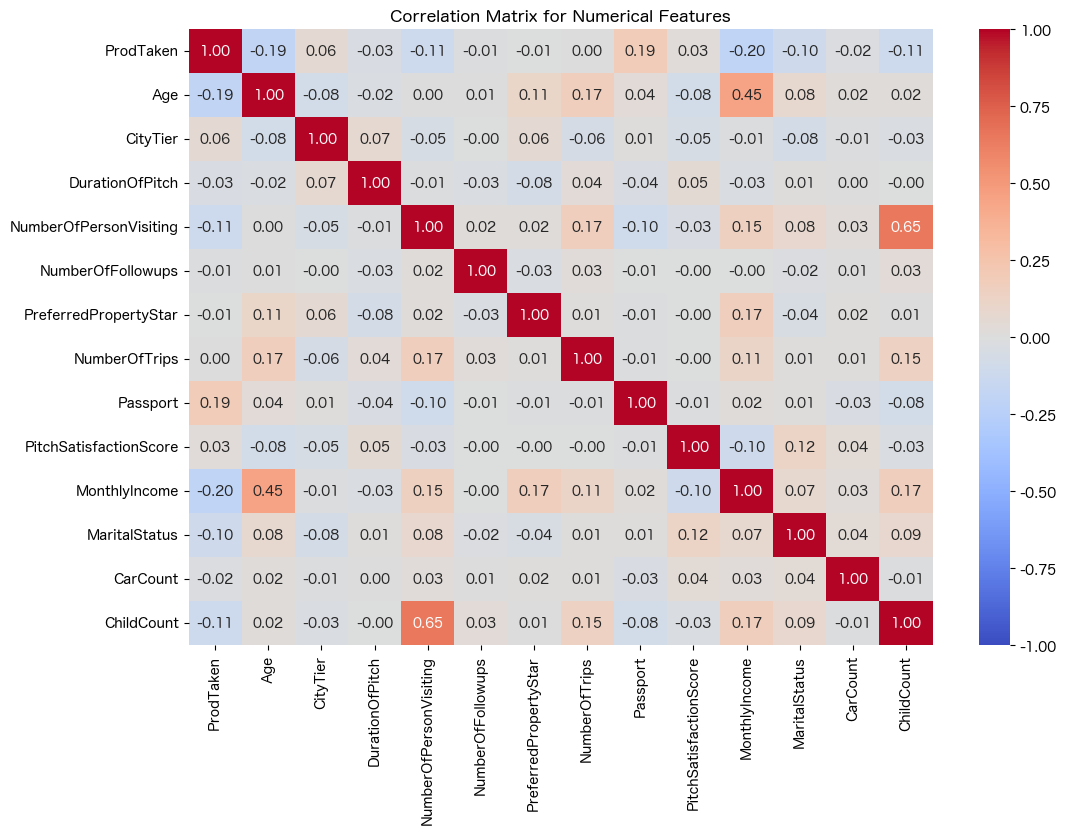

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 日本語フォントの設定
plt.rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro']  # Mac用
plt.rcParams['axes.unicode_minus'] = False

# データファイルを読み込み
data_path = '/Users/hayakawakazue/Downloads/signate/train/train_customer_info_cleaned_with_imputation.csv'
train_data = pd.read_csv(data_path, low_memory=False, dtype={'MaritalStatus': 'Int64', 'CarCount': 'Int64', 'ChildCount': 'Int64'})

# 数値変数のリスト
num_columns = [
    'ProdTaken','Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 
    'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 
    'MonthlyIncome', 'MaritalStatus', 'CarCount', 'ChildCount'
]

# 数値変数間の相関行列を作成
corr_matrix = train_data[num_columns].corr()

# ヒートマップで相関行列を可視化
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Numerical Features')
plt.show()



## 21.カテゴリ変数と数値変数との関係を可視化する

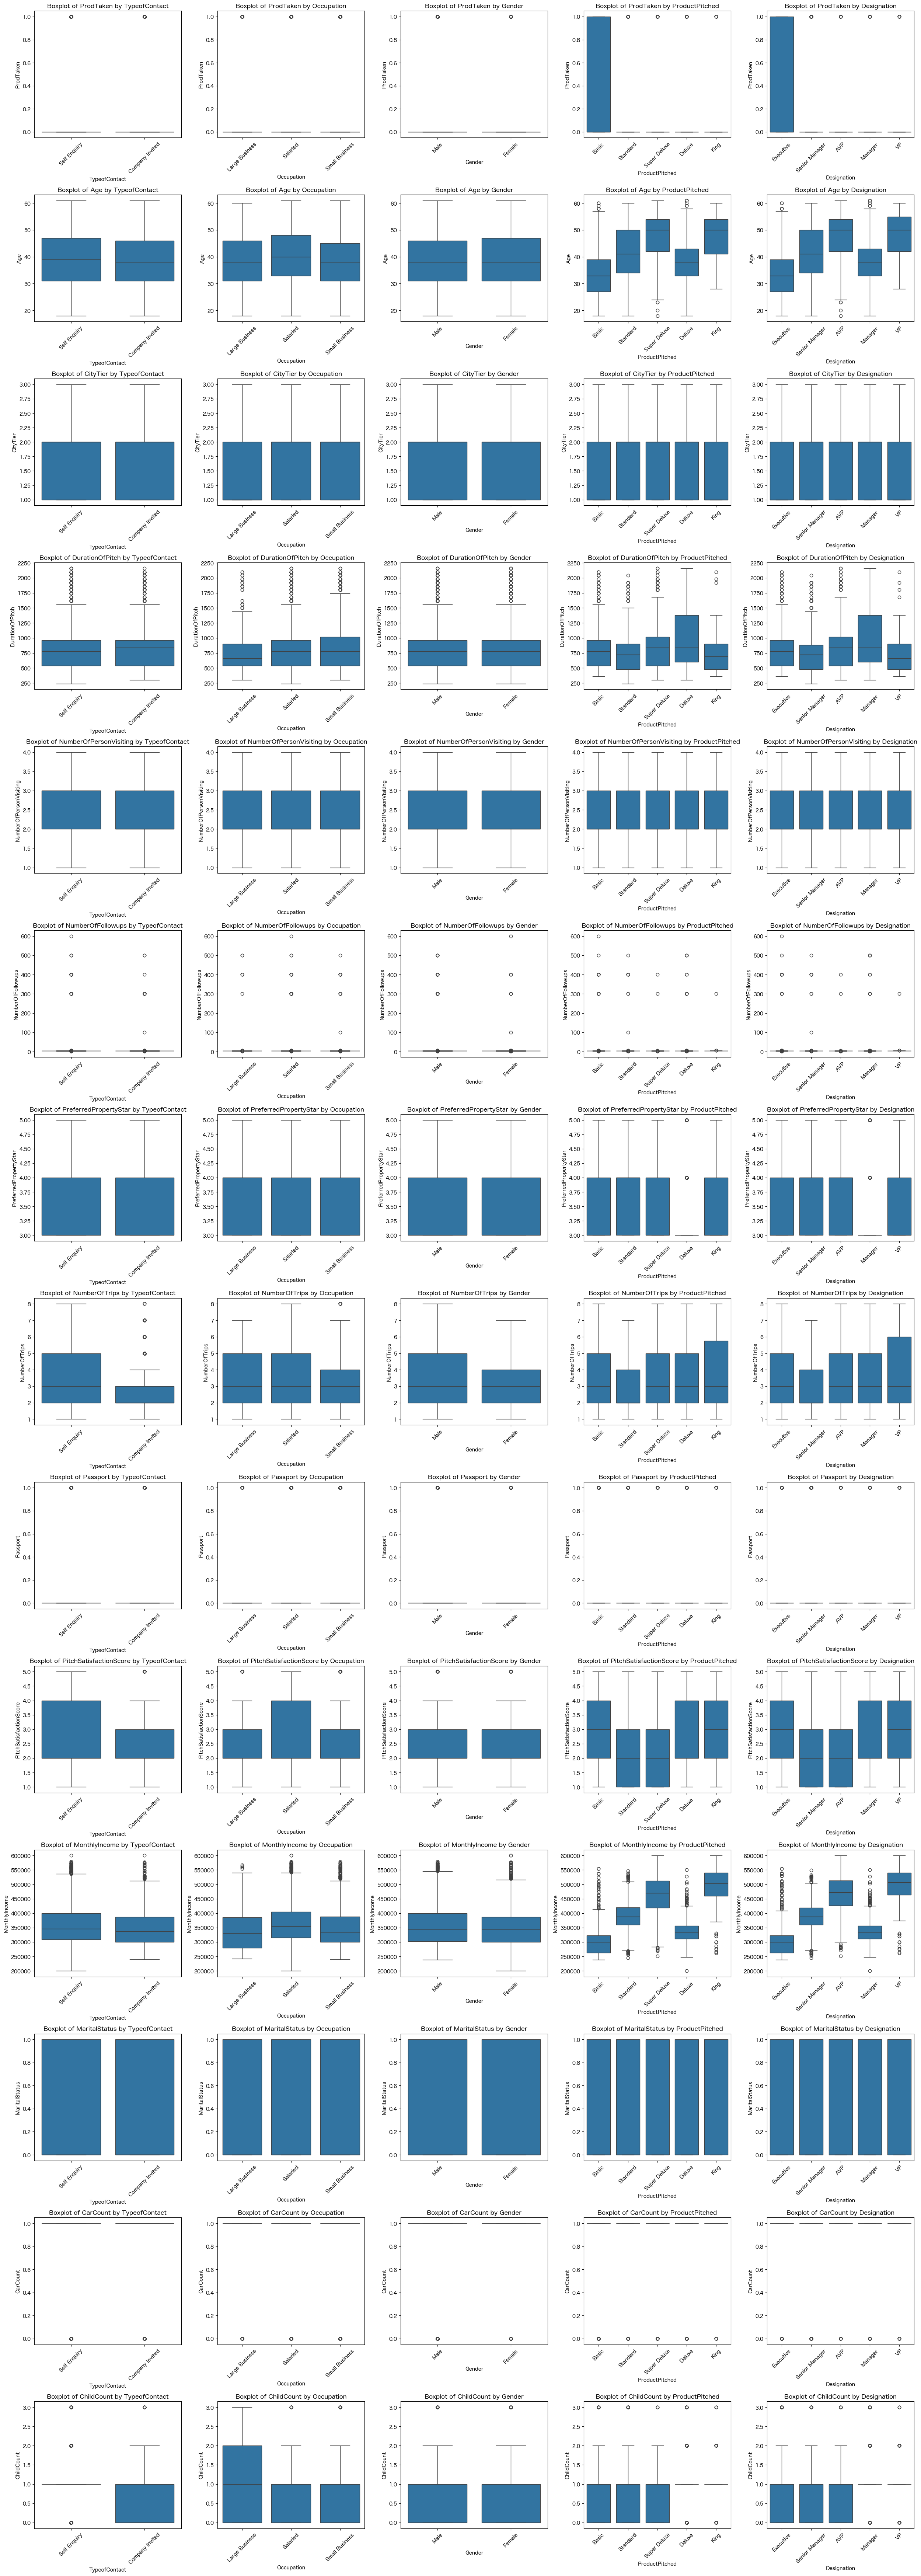

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# データファイルを読み込み
data_path = '/Users/hayakawakazue/Downloads/signate/train/train_customer_info_cleaned_with_imputation.csv'
train_data = pd.read_csv(data_path, low_memory=False)

# カテゴリ変数と数値変数のリスト
cat_columns = ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'Designation']
num_columns = ['ProdTaken','Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 
               'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 
               'MonthlyIncome', 'MaritalStatus', 'CarCount', 'ChildCount']

# サブプロットのレイアウトを設定（横に5プロット、縦に14プロット並べる）
n_cols = 5
n_rows = len(num_columns)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))
fig.subplots_adjust(hspace=0.5)

# カテゴリ変数と数値変数との関係を可視化
for col_idx, cat_col in enumerate(cat_columns):
    for row_idx, num_col in enumerate(num_columns):
        sns.boxplot(x=cat_col, y=num_col, data=train_data, ax=axes[row_idx, col_idx])
        axes[row_idx, col_idx].set_title(f'Boxplot of {num_col} by {cat_col}')
        axes[row_idx, col_idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## 22.データ型の確認

In [34]:
# データファイルを読み込み
data_path = '/Users/hayakawakazue/Downloads/signate/train/train_customer_info_cleaned_with_imputation.csv'
train_data = pd.read_csv(data_path, low_memory=False)
print(train_data.dtypes)

Age                        int64
TypeofContact             object
CityTier                   int64
DurationOfPitch            int64
Occupation                object
Gender                    object
NumberOfPersonVisiting     int64
NumberOfFollowups          int64
ProductPitched            object
PreferredPropertyStar      int64
NumberOfTrips              int64
Passport                   int64
PitchSatisfactionScore     int64
Designation               object
MonthlyIncome              int64
ProdTaken                  int64
MaritalStatus              int64
CarCount                   int64
ChildCount                 int64
dtype: object


## 23.ヒストグラムとボッツクスプロットで外れ値を確認する

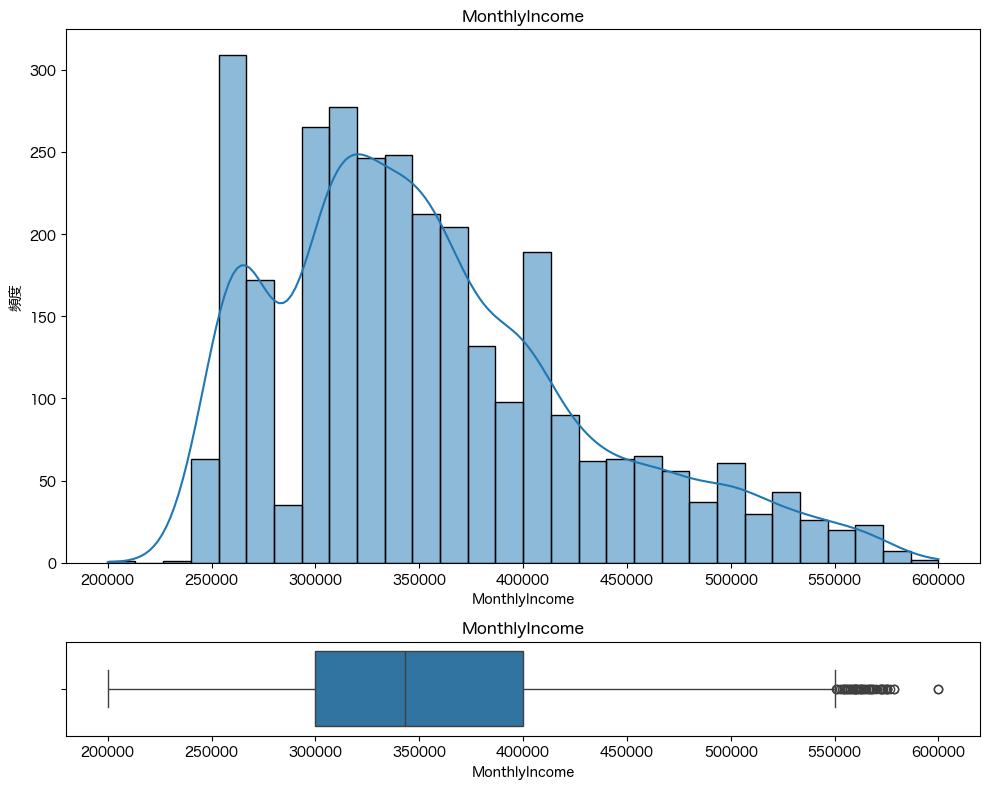

count      3037.000000
mean     354969.074745
std       74822.267068
min      200000.000000
25%      300000.000000
50%      343140.000000
75%      400000.000000
max      600000.000000
Name: MonthlyIncome, dtype: float64


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 日本語フォントの設定
plt.rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro']  # Mac用
plt.rcParams['axes.unicode_minus'] = False

# データファイルを読み込み
data_path = '/Users/hayakawakazue/Downloads/signate/train/NumberOfFollowups_cleaned.csv'
train_data = pd.read_csv(data_path, low_memory=False, dtype={'MaritalStatus': 'Int64', 'CarCount': 'Int64', 'ChildCount': 'Int64'})

# FigureとAxesオブジェクトを作成
fig, (ax_hist, ax_box) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), gridspec_kw={"height_ratios": (.85, .15)})

# 選択した特徴量のヒストグラムを作成
sns.histplot(train_data['MonthlyIncome'], bins=30, kde=True, ax=ax_hist)
ax_hist.set_title('MonthlyIncome')
ax_hist.set_xlabel('MonthlyIncome')
ax_hist.set_ylabel('頻度')

# 選択した特徴量のボックスプロットを作成
sns.boxplot(x=train_data['MonthlyIncome'], ax=ax_box)
ax_box.set_title('MonthlyIncome')
ax_box.set_xlabel('MonthlyIncome')

# レイアウト調整
plt.tight_layout()
plt.show()

# DurationOfPitchの統計情報を表示
print(train_data['MonthlyIncome'].describe())


## 24.外れ値がある場合は削除する

Lower bound: 150000.0, Upper bound: 550000.0
count      2989.000000
mean     351587.668116
std       70447.545682
min      200000.000000
25%      300000.000000
50%      342795.000000
75%      395520.000000
max      550000.000000
Name: MonthlyIncome, dtype: float64


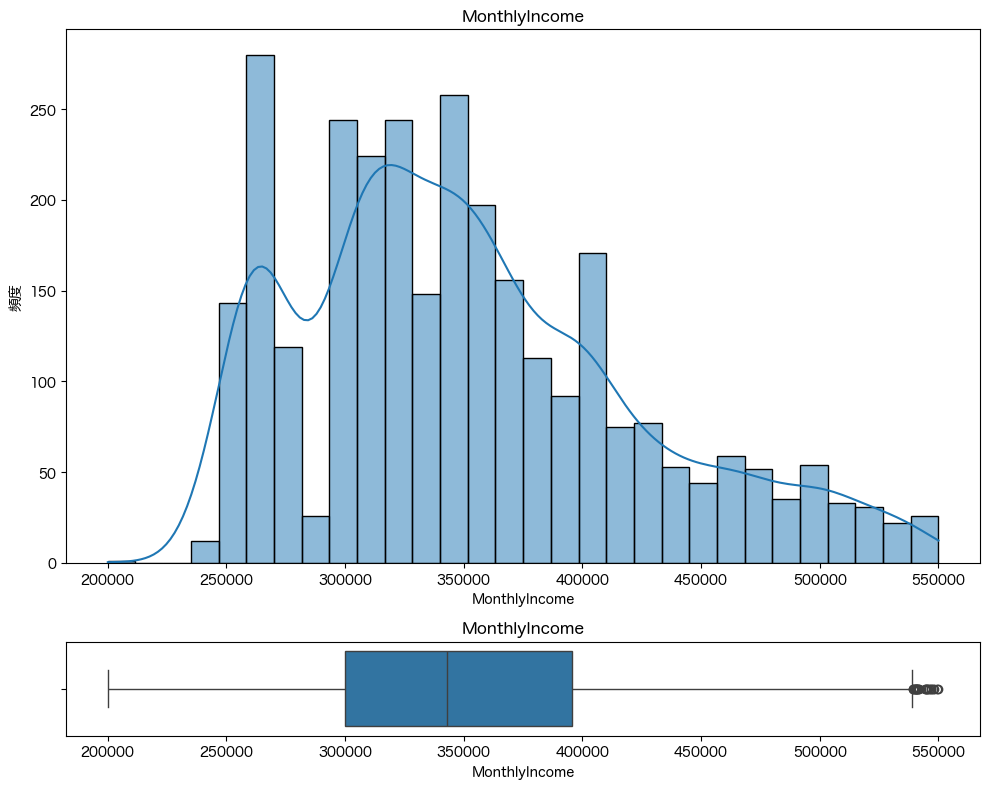

外れ値を削除したデータを保存しました: /Users/hayakawakazue/Downloads/signate/train/MonthlyIncome_cleaned.csv


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 日本語フォントの設定
plt.rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro']  # Mac用
plt.rcParams['axes.unicode_minus'] = False

# データファイルを読み込み
data_path = '/Users/hayakawakazue/Downloads/signate/train/NumberOfFollowups_cleaned.csv'
train_data = pd.read_csv(data_path, low_memory=False, dtype={'MaritalStatus': 'Int64', 'CarCount': 'Int64', 'ChildCount': 'Int64'})

# IQRを計算
Q1 = train_data['MonthlyIncome'].quantile(0.25)
Q3 = train_data['MonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1

# 外れ値の定義
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 外れ値の確認（デバッグ用）
print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

# 外れ値を削除
train_data_cleaned = train_data[(train_data['MonthlyIncome'] >= lower_bound) & (train_data['MonthlyIncome'] <= upper_bound)]

# 削除後の統計情報の確認
print(train_data_cleaned['MonthlyIncome'].describe())

# FigureとAxesオブジェクトを作成
fig, (ax_hist, ax_box) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), gridspec_kw={"height_ratios": (.85, .15)})

# 選択した特徴量のヒストグラムを作成
sns.histplot(train_data_cleaned['MonthlyIncome'], bins=30, kde=True, ax=ax_hist)
ax_hist.set_title('MonthlyIncome')
ax_hist.set_xlabel('MonthlyIncome')
ax_hist.set_ylabel('頻度')

# 選択した特徴量のボックスプロットを作成
sns.boxplot(x=train_data_cleaned['MonthlyIncome'], ax=ax_box)
ax_box.set_title('MonthlyIncome')
ax_box.set_xlabel('MonthlyIncome')

# レイアウト調整
plt.tight_layout()
plt.show()

# 外れ値を削除したデータを保存
output_path_cleaned = '/Users/hayakawakazue/Downloads/signate/train/MonthlyIncome_cleaned.csv'
train_data_cleaned.to_csv(output_path_cleaned, index=False)
print(f"外れ値を削除したデータを保存しました: {output_path_cleaned}")


## 25.IQRで計算してクリッピングを適用する

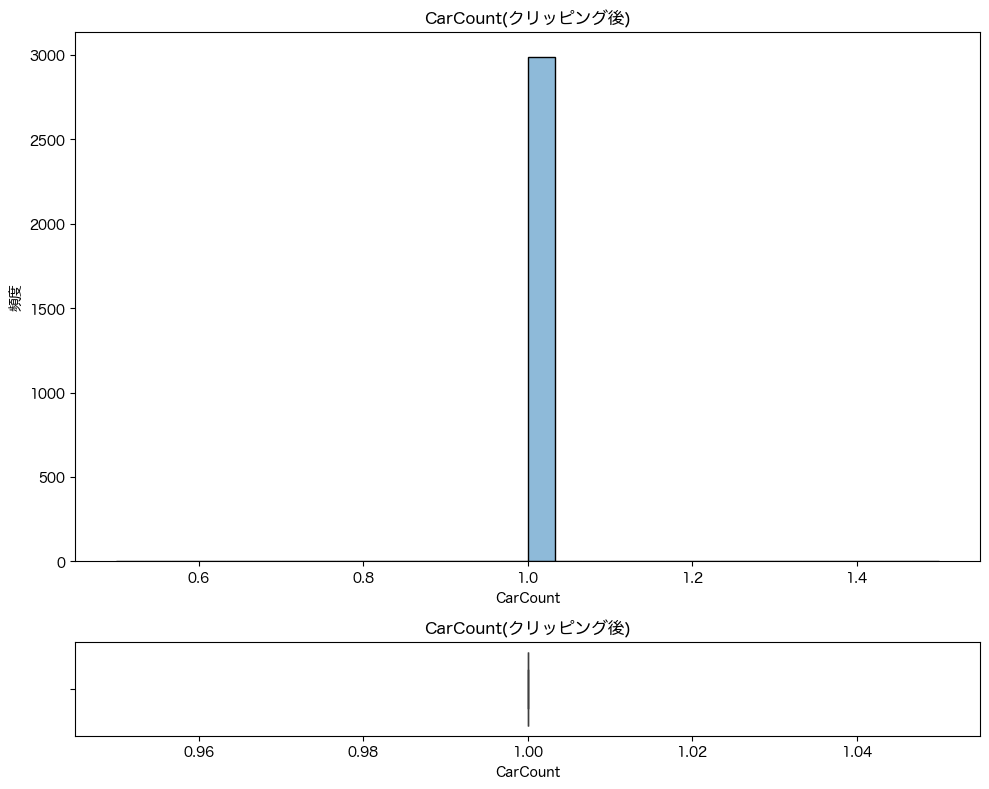

クリッピング後のデータを保存しました: /Users/hayakawakazue/Downloads/signate/train/CarCount_clipped.csv
count    2989.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: CarCount, dtype: float64


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 日本語フォントの設定
plt.rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro']  # Mac用
plt.rcParams['axes.unicode_minus'] = False

# 外れ値削除後のデータを読み込み
data_path_cleaned = '/Users/hayakawakazue/Downloads/signate/train/MonthlyIncome_clipped.csv'
train_data_cleaned = pd.read_csv(data_path_cleaned, low_memory=False)

# IQRを計算してクリッピングの範囲を決定
Q1 = train_data_cleaned['CarCount'].quantile(0.25)
Q3 = train_data_cleaned['CarCount'].quantile(0.75)
IQR = Q3 - Q1

# クリッピングの上下限を設定
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# クリッピングを適用
train_data_cleaned['CarCount'] = np.clip(train_data_cleaned['CarCount'], lower_bound, upper_bound)

# FigureとAxesオブジェクトを作成
fig, (ax_hist, ax_box) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), gridspec_kw={"height_ratios": (.85, .15)})

# クリッピング後のヒストグラムを作成
sns.histplot(train_data_cleaned['CarCount'], bins=30, kde=True, ax=ax_hist)
ax_hist.set_title('CarCount(クリッピング後)')
ax_hist.set_xlabel('CarCount')
ax_hist.set_ylabel('頻度')

# クリッピング後のボックスプロットを作成
sns.boxplot(x=train_data_cleaned['CarCount'], ax=ax_box)
ax_box.set_title('CarCount(クリッピング後)')
ax_box.set_xlabel('CarCount')

# レイアウト調整
plt.tight_layout()
plt.show()

# クリッピング後のデータを保存
output_path_clipped = '/Users/hayakawakazue/Downloads/signate/train/CarCount_clipped.csv'
train_data_cleaned.to_csv(output_path_clipped, index=False)
print(f"クリッピング後のデータを保存しました: {output_path_clipped}")

# ChildCountの統計情報を表示
print(train_data_cleaned['CarCount'].describe())


## 閾値を指定してクリッピングする

=== ChildCountの統計情報（クリッピング後） ===
count    2989.000000
mean        0.924724
std         0.735881
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: ChildCount, dtype: float64


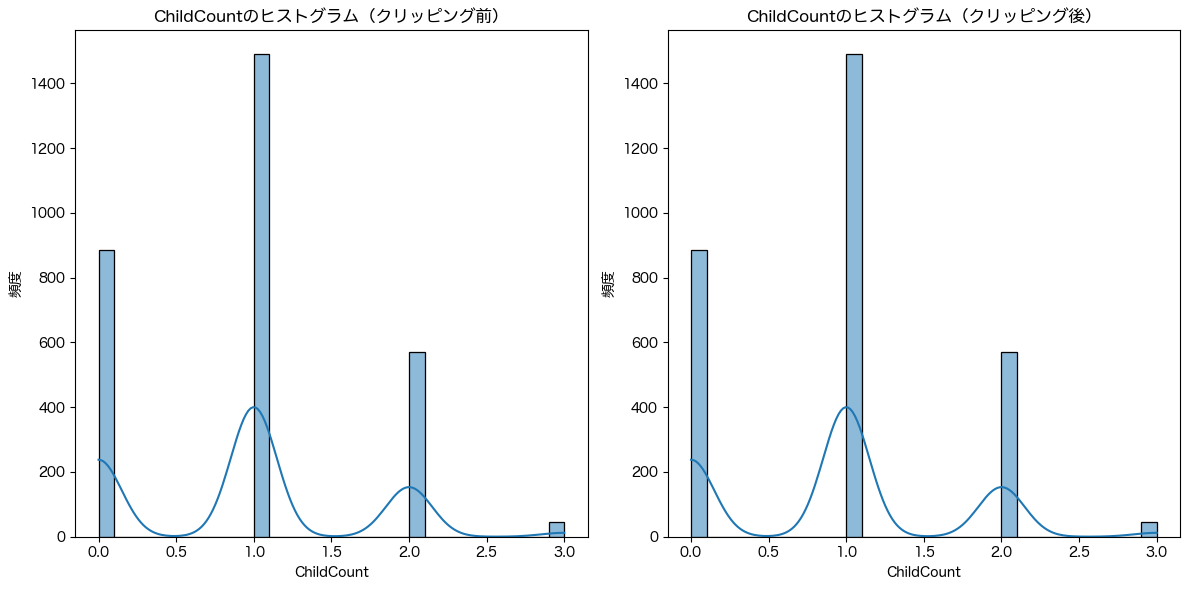

クリッピング後のデータを保存しました: /Users/hayakawakazue/Downloads/signate/train/train_clipped_outliers_ChildCount.csv


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 外れ値削除後のデータを読み込み
data_path_cleaned = '/Users/hayakawakazue/Downloads/signate/train/CarCount_clipped.csv'
df = pd.read_csv(data_path_cleaned, low_memory=False)

# ChildCountを3でクリッピング
df['ChildCount'] = df['ChildCount'].clip(upper=3)

# クリッピング後に整数型に変換（もしデータが少数の場合）
if df['ChildCount'].dtype == 'float64':
    df['ChildCount'] = df['ChildCount'].round().astype('int64')

# 統計情報の表示（クリッピング後）
print('=== ChildCountの統計情報（クリッピング後） ===')
print(df['ChildCount'].describe())

# クリッピング前のヒストグラム
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['ChildCount'], bins=30, kde=True)
plt.title('ChildCountのヒストグラム（クリッピング前）')
plt.xlabel('ChildCount')
plt.ylabel('頻度')

# クリッピング後のヒストグラム
plt.subplot(1, 2, 2)
sns.histplot(df['ChildCount'], bins=30, kde=True)
plt.title('ChildCountのヒストグラム（クリッピング後）')
plt.xlabel('ChildCount')
plt.ylabel('頻度')

plt.tight_layout()
plt.show()

# 処理したデータを保存
output_path_clipped = '/Users/hayakawakazue/Downloads/signate/train/train_clipped_outliers_ChildCount.csv'
df.to_csv(output_path_clipped, index=False)
print(f"クリッピング後のデータを保存しました: {output_path_clipped}")
